In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats

In [2]:
df = pd.read_csv('C:/Users/lavig/OneDrive - McGill University/research/publishing/inprep_Lavigne_EurNPP_CTCognition/data/FEP_LAMmerged.csv')
df.columns

Index(['id', 'study', 'group', 'battery', 'civet_qc', 'icv', 'tbv', 'sex',
       'age', 'handedness', 'education', 'iq_mes', 'iq', 'ses_score',
       'ses_range', 'z_vm', 'z_vism', 'z_wm', 'z_ps', 'z_ef', 'z_att', 'z_gci',
       'dx', 'dx_spectrum', 'sec_dx1', 'sec_dx2', 'sec_dx3', 'sec_dx4',
       'sec_dx5', 'duponset', 'onset', 'dui', 'dur_illness', 'sofas',
       'cpz_adherence', 'saps', 'sans', 'z_vm_spec', 'z_vism_spec',
       'z_wm_spec', 'z_ps_spec', 'z_ef_spec', 'z_att_spec',
       'mean_thickness20mm_2_1_1_harmonized', 'prepost', 'doc_dx', 'dx_cat',
       'sec_dx', 'subs_yn', 'subs', 'med_anti'],
      dtype='object')

In [3]:
cog = df[['group','study','z_ps','z_att','z_wm','z_vm','z_vism','z_ef']]
cog = cog.groupby(['group','study']).mean().transpose()
cog.index=['PS','ATT','WM','VM','VISM','EF']
cog

group         1                   2          
study         1         2         1         2
PS     0.047288 -0.483637 -0.425737 -0.687627
ATT    0.066855  0.042545 -0.650801 -0.112233
WM     0.024582  0.102389 -0.529846 -0.762135
VM    -0.011583  0.204887 -0.961288 -1.086192
VISM   0.020095  0.074392 -0.890908 -0.655955
EF    -0.001644 -0.010080 -0.755718 -1.087824

In [4]:
errs = scipy.stats.sem(cog,axis=1)
errs

array([0.15540843, 0.16723432, 0.21082418, 0.32742805, 0.24196815,
       0.27295783])

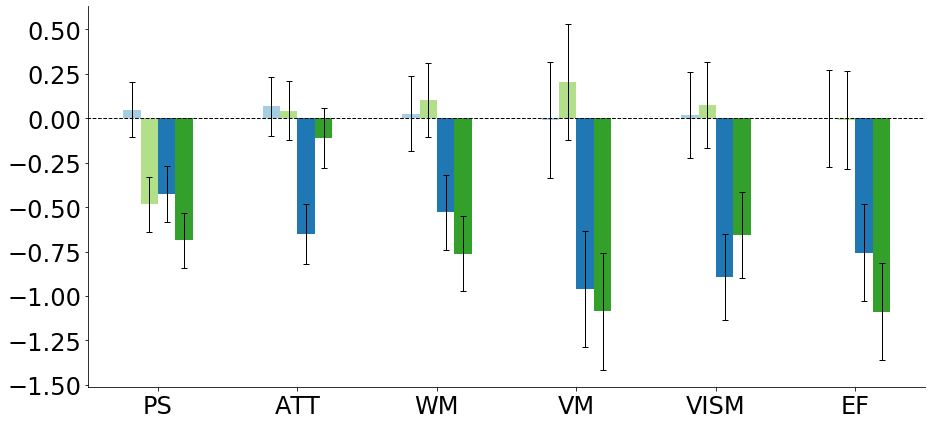

In [5]:
ax = cog.plot(kind = 'bar', 
              rot=0, 
              color=[plt.cm.Paired(0),plt.cm.Paired(2),plt.cm.Paired(1),plt.cm.Paired(3)], 
              legend=False, 
              fontsize=24,
              yerr = errs,
              error_kw=dict(lw=1, capsize=3, capthick=1),
              capsize=4,
              figsize = [15,7])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.hlines(y= 0, xmin=-1, xmax=10, color='black', linestyle ='dashed', linewidth = 1)
plt.rcParams['font.family'] = ['serif']
plt.rcParams['font.serif'] = ['Times New Roman']
plt.savefig('fig1.tif', dpi=300)